###**Importações necessários para o projeto**

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("krishnaraj30/finance-loan-approval-prediction-data")

files = os.listdir(path)

csv_file = [f for f in files if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

# **Análise Descritiva do Dataset de Aprovação de Empréstimos**

O conjunto de dados fornecido contém informações sobre clientes que solicitaram empréstimos, incluindo diversas características financeiras e pessoais que podem influenciar a aprovação. Abaixo está uma análise descritiva das variáveis presentes no dataset.

## 📌 As variáveis do dataset incluem:

- **Gender**: Gênero do solicitante (Masculino/Feminino).
- **Married**: Indica se o solicitante é casado (Sim/Não).
- **Dependents**: Número de dependentes do solicitante.
- **Education**: Nível de educação do solicitante (Graduado/Não Graduado).
- **Self_Employed**: Indica se o solicitante é autônomo (Sim/Não).
- **ApplicantIncome**: Renda do solicitante.
- **CoapplicantIncome**: Renda do co-solicitante (se houver).
- **LoanAmount**: Valor do empréstimo solicitado.
- **Loan_Amount_Term**: Prazo do empréstimo (em meses).
- **Credit_History**: Histórico de crédito (1 = Bom, 0 = Ruim).
- **Property_Area**: Localização do imóvel (Urbano, Semiurbano, Rural).
- **Loan_Status**: Variável alvo, indicando se o empréstimo foi aprovado (Y) ou negado (N).

A seguir, exploraremos estatísticas descritivas e visualizações gráficas para compreender melhor os padrões desse conjunto de dados.


###**Visão geral dos dados**

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###**Checagem de campos nulos**

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


###**Apresentação Visual dos Dados**

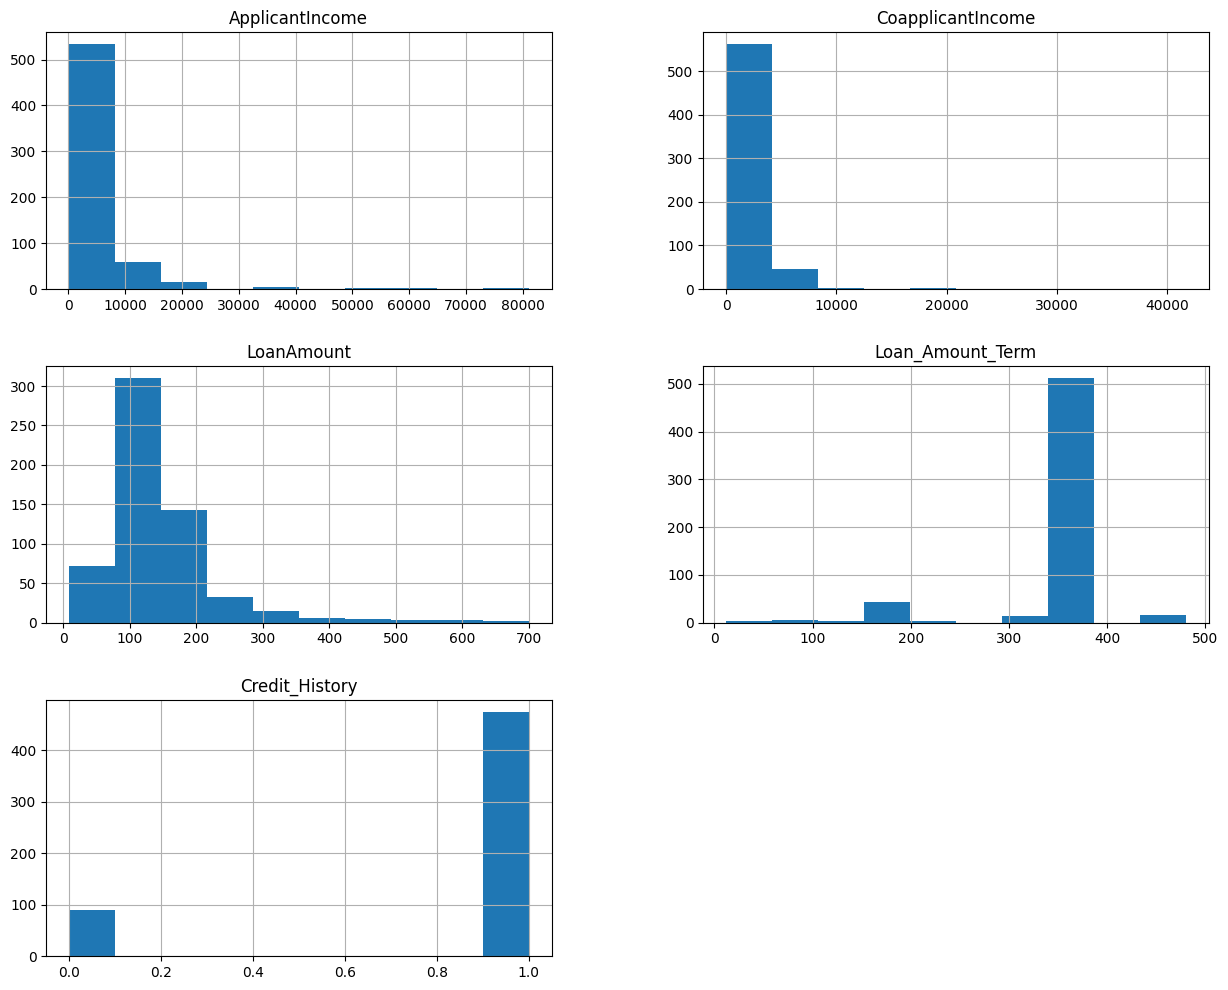

In [ ]:
df.hist(figsize=(15, 12))
plt.show()

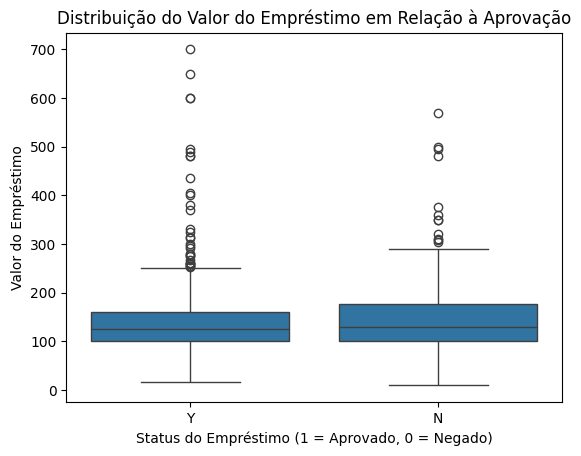

In [ ]:
sns.boxplot(x='Loan_Status', y="LoanAmount", data=df)
plt.title('Distribuição do Valor do Empréstimo em Relação à Aprovação')
plt.xlabel('Status do Empréstimo (1 = Aprovado, 0 = Negado)')
plt.ylabel('Valor do Empréstimo')
plt.show()

###**Modelos Preditivos**

In [ ]:
X = df.drop('Loan_Status', axis=1)  # Todas as colunas, exceto 'Loan_Status'
y = df['Loan_Status']  # A coluna 'Loan_Status' é o target

if 'Loan_ID' in df.columns:
    df = df.drop(columns=['Loan_ID'])

df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0}) # Conversão de valores categóricos para numéricos
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Dependents'] = df['Dependents'].map({'3+': 3, '2': 2, '1': 1, '0': 0})

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
X_treino.shape

(491, 11)

In [ ]:
y_treino.shape

(491,)

###**Modelo de Aprendizado de Máquina: Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
modeloarvore = DecisionTreeClassifier(max_depth=3, random_state=42)

# Treinamento
modeloarvore.fit(X_treino, y_treino)

# Predição
predicoes_arvore = modeloarvore.predict(X_teste)

# Avaliação
acuracia_arvore = accuracy_score(y_teste, predicoes_arvore)
print(f'Acurácia da Árvore de Decisão: {acuracia_arvore:.2f}')

Acurácia da Árvore de Decisão: 0.85


###**Matriz de Confusão da Árvore de Decisão**

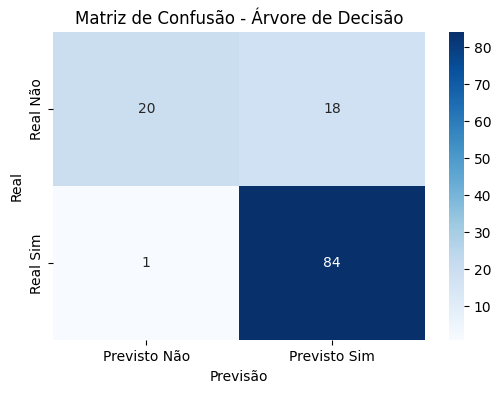

In [ ]:
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_teste, predicoes_arvore)

# Apresentação da matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(mc, annot=True, fmt="d", cmap="Blues", xticklabels=["Previsto Não", "Previsto Sim"], yticklabels=["Real Não", "Real Sim"])
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()